In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [2]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')
june_over_perc = ts((june_over$series/june_over$total)[49:(24*30)], frequency=24)
june_under_perc = ts((june_under$series/june_under$total)[49:(24*30)], frequency=24)

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [3]:
jo = ts(june_over$series[49:(24*30)], frequency=24)
ju = ts(june_under$series[49:(24*30)], frequency=24)

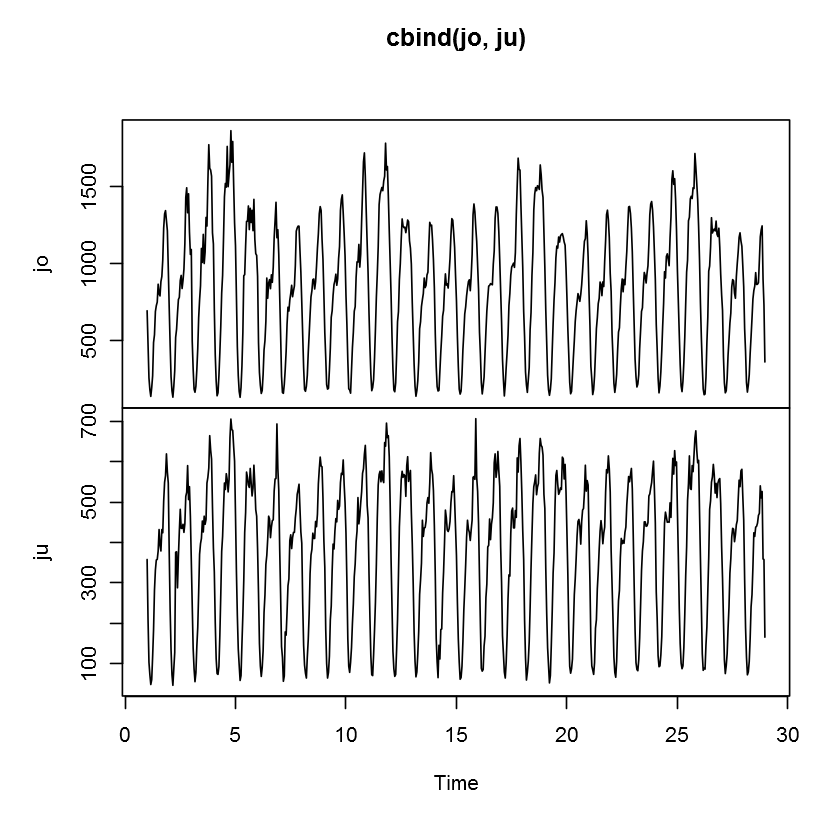

In [4]:
plot.ts(cbind(jo, ju))

Breakdown by day of week:

In [5]:
j_by_weekday = day_of_week(c(as.vector(jo), as.vector(ju)))

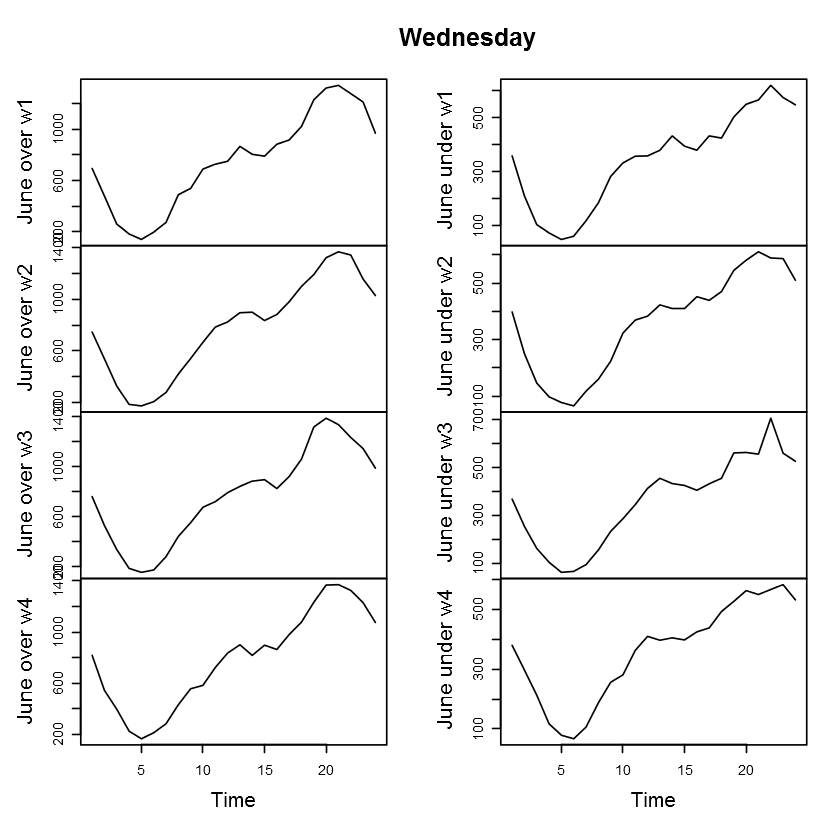

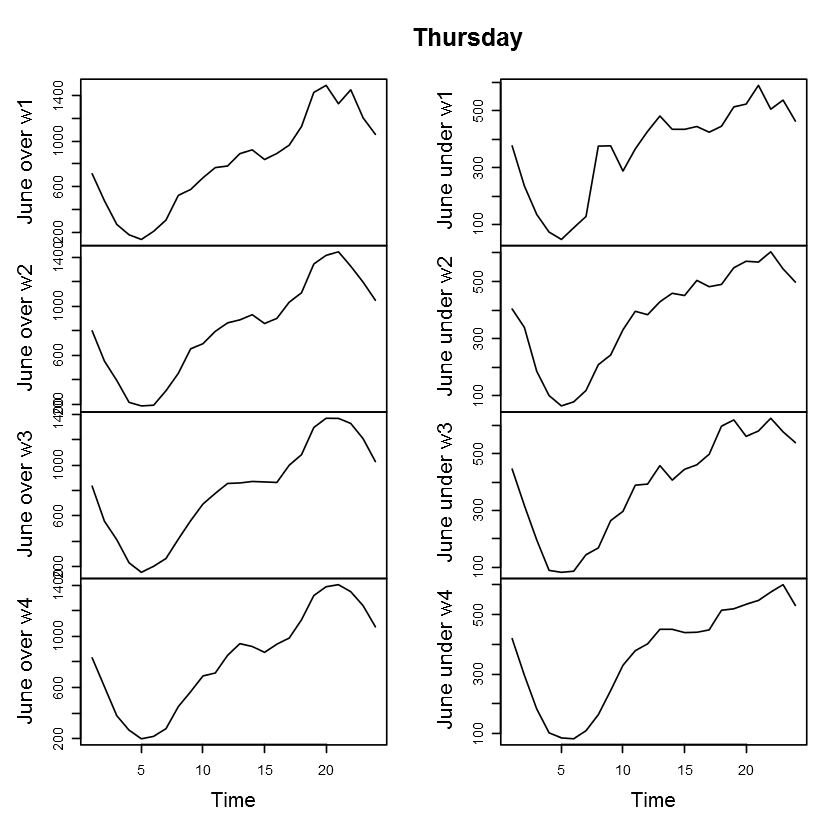

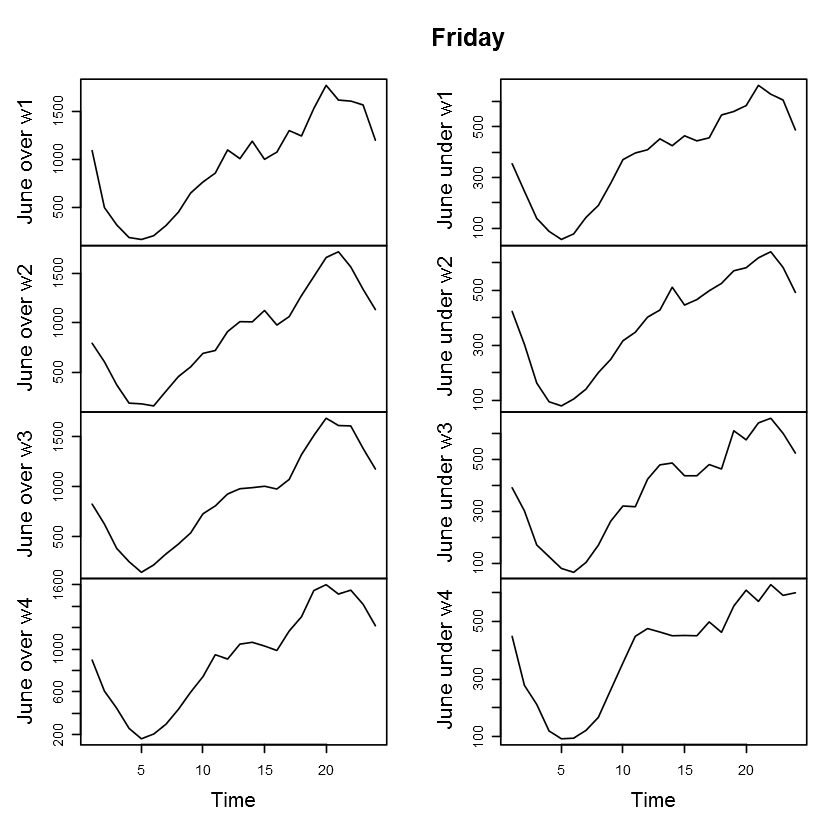

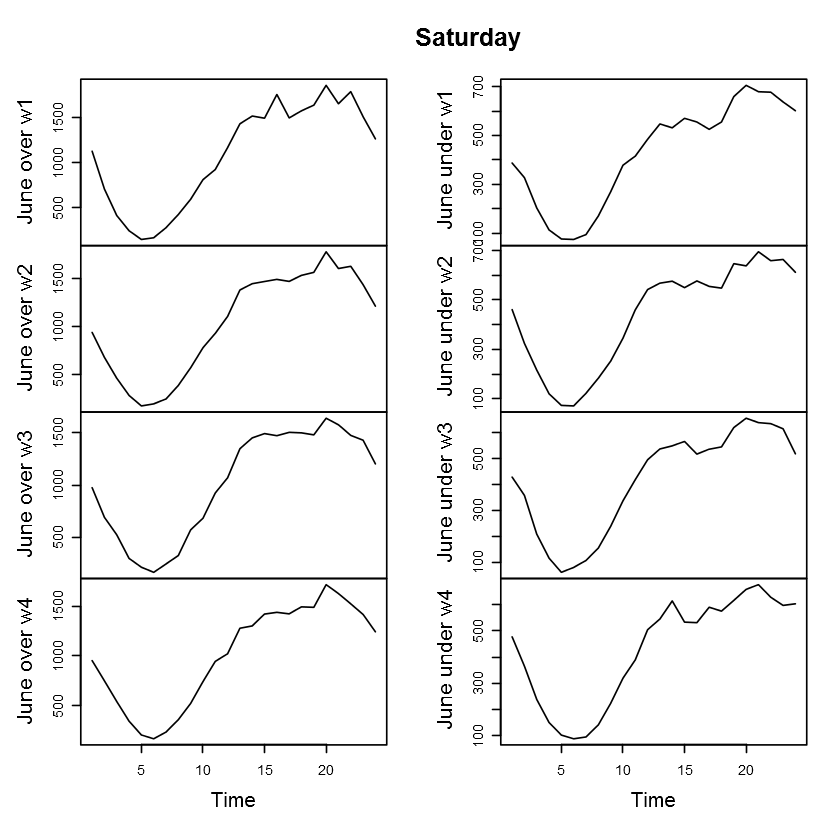

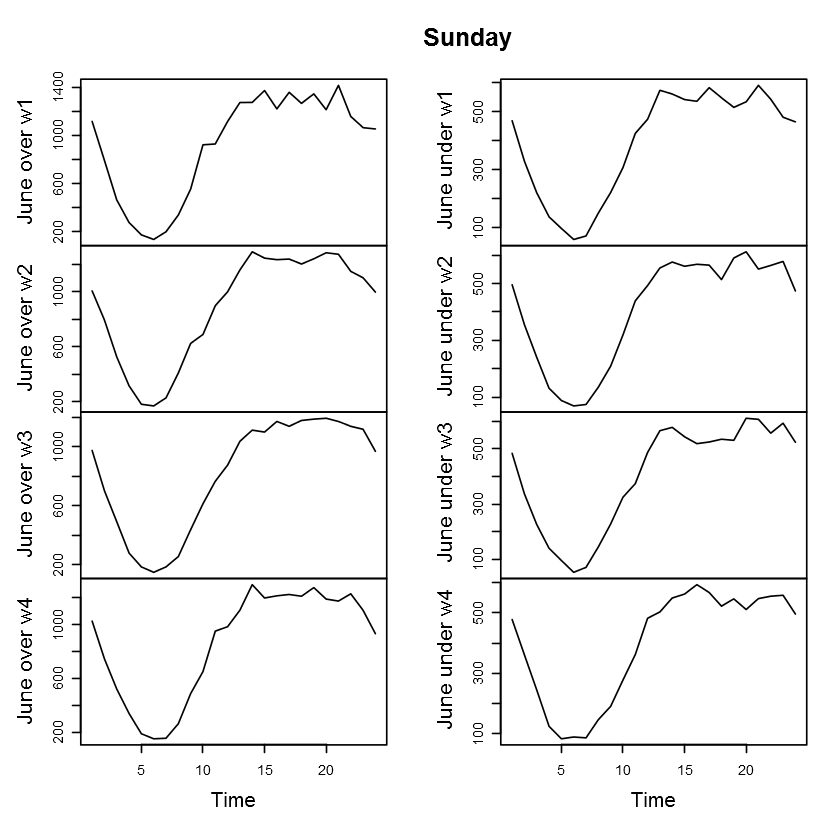

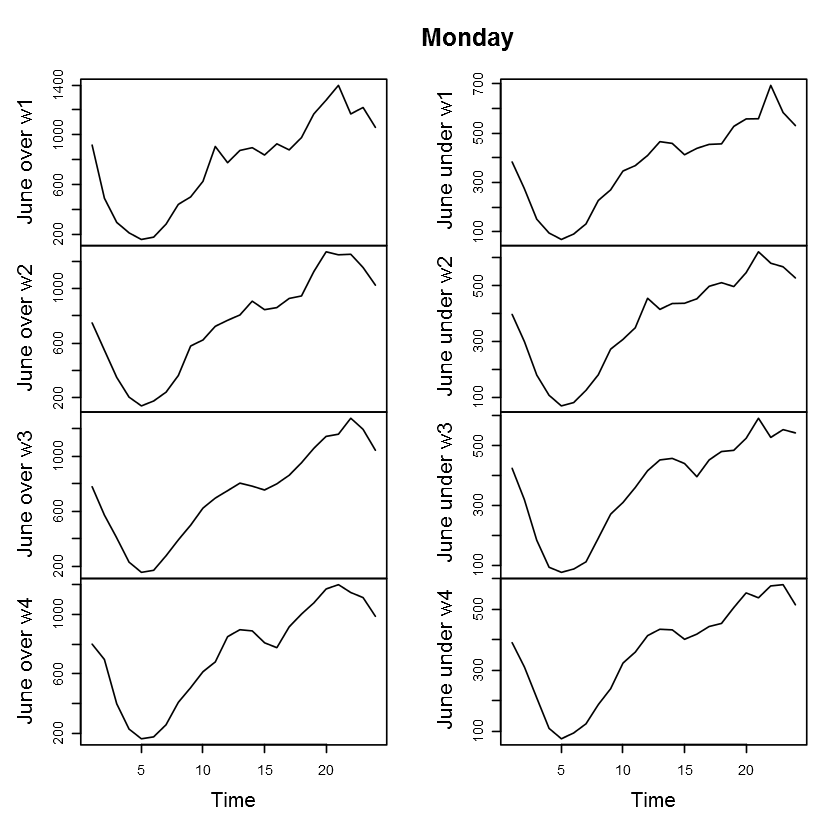

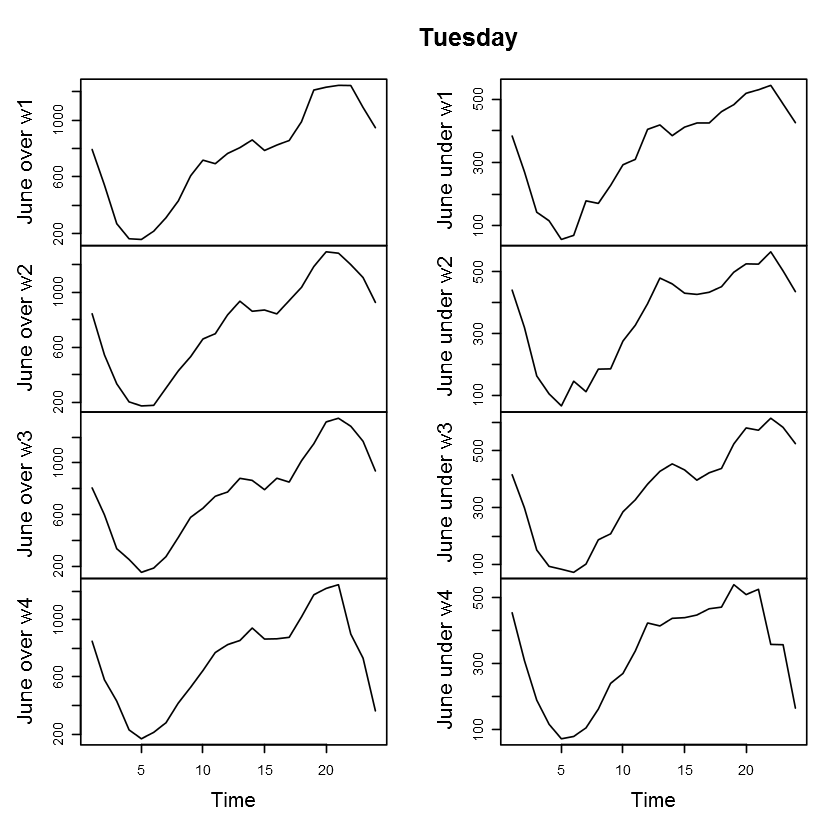

In [7]:
weekdays = c('Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday')
for (weekday in 1:7){
    over_month = data.frame(j_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}